# Final Project
## Sameer Ali, Foundations of Business Programming
### Through a time series data analysis, this project seeks to examine the racial disparities in unemployment from 2010-2019

Dataset: https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020?select=unemployment_data_us.csv

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Exploratory Analysis and Cleaning Data 

In [4]:
data = pd.read_csv('unemployment_data_us.csv')

print(data.head())

# Data is ordered strangely - it goes through all the months, yearly and then 
# proceeds to next month doing the same thing; also 2020 is missing 9 of the months
# (effectively from the beginning of COVID - we will remove this)
# Also - I will try to make the data easier to visualize by seeking only the yearly averages 
# This will require some data cleaning 

data1 = data.sort_values(by = "Year", ascending = True) #Sort by year 
data1.groupby('Year')

print(data1.head()) #Ordered but months are messed up now? 

#Cleaning Data

dict = {}

def appendDict(dict, year, demographic):
    dict[year][demographic].append(row[demographic])

for index, row in data1.iterrows(): #iterating through the rows of the dataset 
    currYear = row["Year"] 
    if currYear == 2020:
        continue #removing 2020 
    if currYear not in dict: #checks to see if Year is in dictionary, if not, then it creates another dict
            dict[currYear] = {"Primary_School" : [row["Primary_School"]],
            "High_School" : [row["High_School"]],
            "Associates_Degree" : [row["Associates_Degree"]],
            "Professional_Degree" : [row["Professional_Degree"]],
            "White" : [row["White"]],
            "Black" : [row["Black"]],
            "Asian" : [row["Asian"]],
            "Hispanic" : [row["Hispanic"]],
            "Men" : [row["Men"]],
            "Women" : [row["Women"]]}
    else: #appends the data into the previously created dict for the specific year 
            appendDict(dict, currYear, "Primary_School")
            appendDict(dict, currYear, "High_School")
            appendDict(dict, currYear, "Associates_Degree")
            appendDict(dict, currYear, "Professional_Degree")
            appendDict(dict, currYear, "White")
            appendDict(dict, currYear, "Black")
            appendDict(dict, currYear, "Asian")
            appendDict(dict, currYear, "Hispanic")
            appendDict(dict, currYear, "Men")
            appendDict(dict, currYear, "Women")

print(dict)

for year in dict.keys(): #iterates through the nested dictionary and finds the mean of eveyry dem, per year
    for demographic in dict[year].keys():
        dict[year][demographic] = np.mean(dict[year][demographic])

newDict = {}

newDict["Year"] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

for year in newDict["Year"]: #Adds year in as row - was not iteretable or callable (see Main.py)
    for demographic in dict[year].keys():
        if demographic not in newDict:
            newDict[demographic] = [dict[year][demographic]]
        else:
            newDict[demographic].append(dict[year][demographic])

newDictData = pd.DataFrame(newDict)

print(newDictData)

    Year Month  Primary_School      Date  High_School  Associates_Degree  \
0   2010   Jan            15.3  Jan-2010         10.2                8.6   
55  2010   Jun            14.2  Jun-2010         10.6                8.1   
33  2010   Apr            14.7  Apr-2010         10.8                8.4   
22  2010   Mar            14.9  Mar-2010         11.0                8.4   
99  2010   Oct            15.0  Oct-2010          9.8                8.2   

    Professional_Degree  White  Black  Asian  Hispanic   Men  Women  
0                   4.9    8.8   16.5    8.3      12.9  10.2    7.9  
55                  4.4    8.6   15.2    7.4      12.3   9.7    7.7  
33                  4.8    9.0   16.6    7.0      12.5  10.2    8.3  
22                  4.9    8.9   16.8    7.6      12.9  10.2    8.1  
99                  4.6    8.6   15.6    7.2      12.3   9.4    8.0  
{2010: {'Primary_School': [15.3, 14.2, 14.7, 14.9, 15.0, 14.1, 15.8, 14.6, 15.0, 15.6, 15.4, 13.5], 'High_School': [10.2, 1

## Basic Visualization 

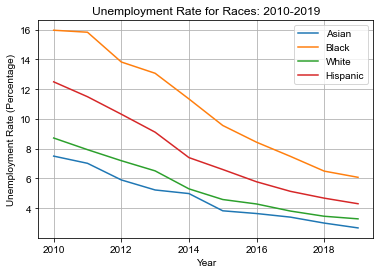

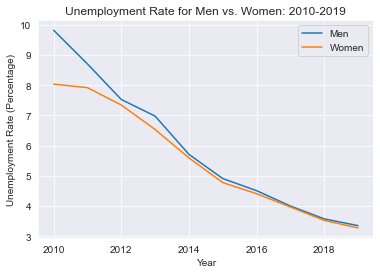

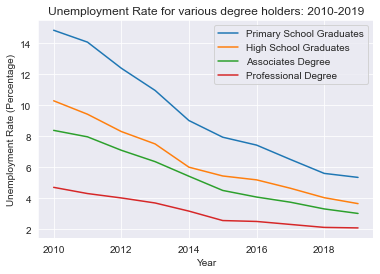

In [3]:
sns.lineplot(x = "Year", y = "Asian", data = newDictData)
sns.lineplot(x = "Year", y = "Black", data = newDictData)
sns.lineplot(x = "Year", y = "White", data = newDictData)
sns.lineplot(x = "Year", y = "Hispanic", data = newDictData)

plt.legend(["Asian", "Black", "White", "Hispanic"])

sns.set_style("dark")
plt.title("Unemployment Rate for Races: 2010-2019")
plt.ylabel("Unemployment Rate (Percentage)")
plt.grid(True)
plt.show()


sns.lineplot(x = "Year", y = "Men", data = newDictData)
sns.lineplot(x = "Year", y = "Women", data = newDictData)
plt.title("Unemployment Rate for Men vs. Women: 2010-2019")
plt.legend(["Men", "Women"])
plt.ylabel("Unemployment Rate (Percentage)")
plt.grid(True)
plt.show()

sns.lineplot(x = "Year", y = "Primary_School", data = newDictData)
sns.lineplot(x = "Year", y = "High_School", data = newDictData)
sns.lineplot(x = "Year", y = "Associates_Degree", data = newDictData)
sns.lineplot(x = "Year", y = "Professional_Degree", data = newDictData)


plt.title("Unemployment Rate for various degree holders: 2010-2019")
plt.legend(["Primary School Graduates", "High School Graduates", "Associates Degree", "Professional Degree"])
plt.ylabel("Unemployment Rate (Percentage)")
plt.grid(True)

## Statistical Visualization 

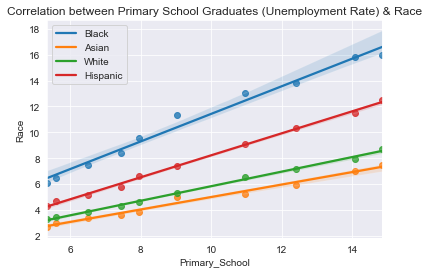

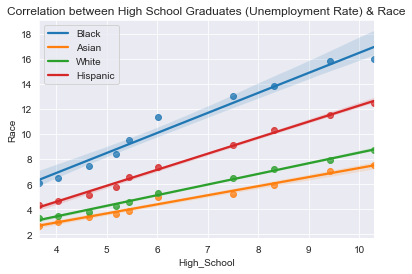

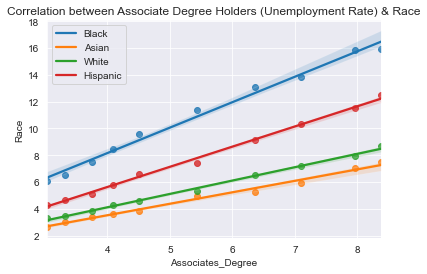

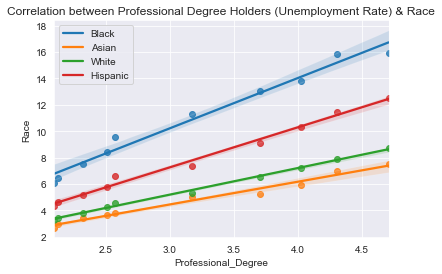

In [4]:
sns.regplot(x = "Primary_School", y = "Black", data = newDictData)
sns.regplot(x = "Primary_School", y = "Asian", data = newDictData)
sns.regplot(x = "Primary_School", y = "White", data = newDictData)
sns.regplot(x = "Primary_School", y = "Hispanic", data = newDictData)

plt.title("Correlation between Primary School Graduates (Unemployment Rate) & Race")
plt.legend(["Black", "Asian", "White", "Hispanic"])
plt.ylabel("Race")
plt.grid(True)
plt.show()

sns.regplot(x = "High_School", y = "Black", data = newDictData)
sns.regplot(x = "High_School", y = "Asian", data = newDictData)
sns.regplot(x = "High_School", y = "White", data = newDictData)
sns.regplot(x = "High_School", y = "Hispanic", data = newDictData)

plt.title("Correlation between High School Graduates (Unemployment Rate) & Race")
plt.legend(["Black", "Asian", "White", "Hispanic"])
plt.ylabel("Race")
plt.grid(True)
plt.show()

sns.regplot(x = "Associates_Degree", y = "Black", data = newDictData)
sns.regplot(x = "Associates_Degree", y = "Asian", data = newDictData)
sns.regplot(x = "Associates_Degree", y = "White", data = newDictData)
sns.regplot(x = "Associates_Degree", y = "Hispanic", data = newDictData)

plt.title("Correlation between Associate Degree Holders (Unemployment Rate) & Race")
plt.legend(["Black", "Asian", "White", "Hispanic"])
plt.ylabel("Race")
plt.grid(True)
plt.show()

sns.regplot(x = "Professional_Degree", y = "Black", data = newDictData)
sns.regplot(x = "Professional_Degree", y = "Asian", data = newDictData)
sns.regplot(x = "Professional_Degree", y = "White", data = newDictData)
sns.regplot(x = "Professional_Degree", y = "Hispanic", data = newDictData)

plt.title("Correlation between Professional Degree Holders (Unemployment Rate) & Race")
plt.legend(["Black", "Asian", "White", "Hispanic"])
plt.ylabel("Race")
plt.grid(True)
plt.show()

## Few Statistical Tests to Test if Difference is Significant

In [5]:
res = stats.ttest_ind(newDictData.Men, newDictData.Women, #Between Men and Women
    equal_var=True)
print(res) #Not Statistically Significantly Different

res = stats.ttest_ind(newDictData.Asian, newDictData.White, #Between White and Asian
    equal_var=True)
print(res) #Not Statistically Significantly Different

res = stats.ttest_ind(newDictData.Asian, newDictData.Black, #Between Black and Asian
    equal_var=True) #Difference is Statistically Significanct
print(res)

res = stats.ttest_ind(newDictData.White, newDictData.Black, #Between Black and White
    equal_var=True) #Difference is Statistically Significanct
print(res)

res = stats.ttest_ind(newDictData.Hispanic, newDictData.Black, #Between Black and Hispanic
    equal_var=True) #Difference is Not statistically significanct
print(res)

res = stats.ttest_ind(newDictData.Primary_School, newDictData.High_School, #Between Primary and High School Grads
    equal_var=True) #Difference is Not Statistically Significanct
print(res)

res = stats.ttest_ind(newDictData.Associates_Degree, newDictData.High_School, #Between High School Graduates and Associate Degree Holders
    equal_var=True) #Difference is Not Statistically Significanct
print(res)

res = stats.ttest_ind(newDictData.Professional_Degree, newDictData.High_School, #Between High School Graduates and Professional Degree Holders
    equal_var=True) #Difference is Statistically Significanct
print(res)

res = stats.ttest_ind(newDictData.Professional_Degree, newDictData.Associates_Degree, #Between Professional and Associate Degree Holders
    equal_var=True) #Difference is Statistically Significanct
print(res)

Ttest_indResult(statistic=0.40508970519674115, pvalue=0.6901854299970067)
Ttest_indResult(statistic=-0.9674131991563288, pvalue=0.3461571686239736)
Ttest_indResult(statistic=-4.700422662185965, pvalue=0.00017828518719816407)
Ttest_indResult(statistic=-3.9753519627176215, pvalue=0.0008872262238368768)
Ttest_indResult(statistic=-2.0438887438944198, pvalue=0.05587943252128567)
Ttest_indResult(statistic=2.2487296038757174, pvalue=0.03729021181596972)
Ttest_indResult(statistic=-1.1081029729834018, pvalue=0.2824049478067857)
Ttest_indResult(statistic=-4.173572279677037, pvalue=0.0005707696347495467)
Ttest_indResult(statistic=-3.2406482138482637, pvalue=0.004537928448138517)
